In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [4]:
data = pd.read_csv("../data/rawTrain.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Stadistics
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age_esc', ylabel='Count'>

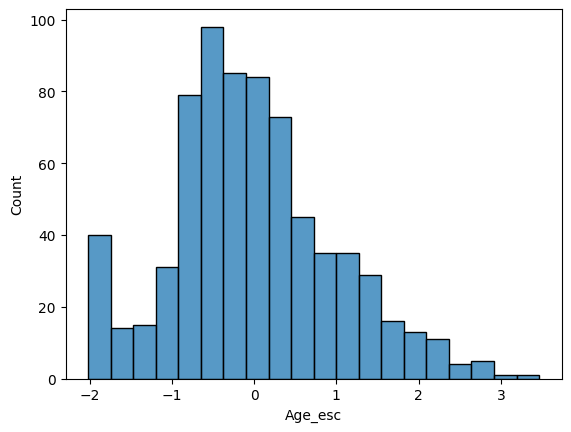

In [7]:
# Standarization
scaler = StandardScaler()
data['Age_esc'] = scaler.fit_transform(data[['Age']])
sns.histplot(data['Age_esc'])

<Axes: xlabel='Age_norm', ylabel='Count'>

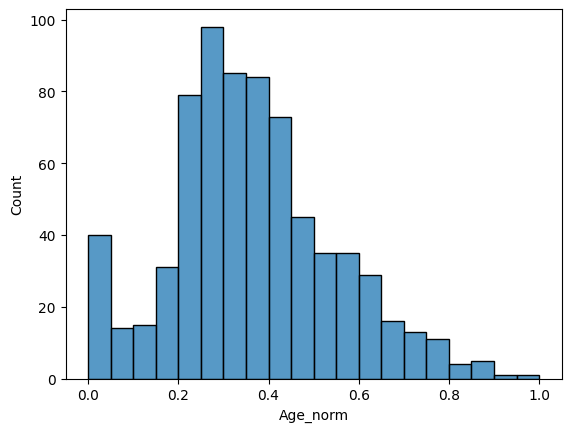

In [8]:
# Normalize (scale) the data
norm = MinMaxScaler()
data['Age_norm'] = norm.fit_transform(data[['Age']])
sns.histplot(data['Age_norm'])

<Axes: xlabel='Age_log', ylabel='Count'>

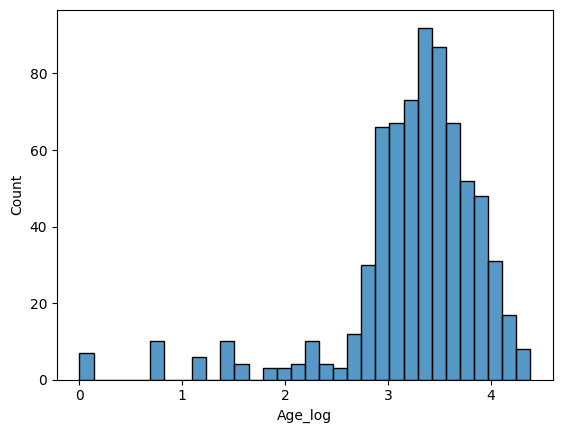

In [9]:
# Logarithmic transformation
# Purpose: Apply logarithmic transformation to Age variable to reduce right skewness
# Technical details:
# 1. Normalize Age values: multiply by 80 if value < 1 (converts fractional ages to comparable scale)
# 2. Apply natural logarithm (ln) to transformed Age values using numpy.log()
# 3. Store result in new column 'Age_log' for comparison with original distribution
# 4. Visualize transformed distribution using seaborn histogram
# Note: Log transformation requires positive values; ensures all Age values > 0 before transformation
data['Age'] = data['Age'].apply(lambda x: x * 80 if x < 1 else x)
data['Age_log'] = np.log(data['Age'])
sns.histplot(data['Age_log'])

In [10]:
# Prepare features and target variable for model training
# X: Feature matrix containing all predictor variables (excludes 'Survived' column)
# y: Target vector containing the binary survival outcome (0 = died, 1 = survived)
x = data.drop('Survived', axis=1)
y = data['Survived']

# Split dataset into training and testing subsets using stratified sampling
# Parameters:
#   - test_size=0.25: Allocates 25% of data for testing, 75% for training
#   - random_state=0: Sets seed for reproducible splits across runs
#   - shuffle=True: Randomly shuffles data before splitting to prevent ordering bias
#   - stratify=y: Maintains proportional class distribution in both train/test sets
# Returns: x_train, x_test (feature sets), y_train, y_test (target sets)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.25, 
    random_state=0, 
    shuffle=True, 
    stratify=y
)


In [11]:
x_train.shape

(668, 14)

In [12]:
x_test.shape

(223, 14)

In [13]:
y_train.shape

(668,)

In [14]:
y_test.shape

(223,)

In [15]:
y_train.value_counts() / len(y_train)

Survived
0    0.616766
1    0.383234
Name: count, dtype: float64

In [16]:
y_test.value_counts() / len(y_test)

Survived
0    0.61435
1    0.38565
Name: count, dtype: float64

# Label encoder (nominals)
Food Name | Categorical # | Calories
Apple     | 1             | 52
Banana    | 2             | 105
Orange    | 3             | 47

- Categories not follows orders
- More fast OneHotEncoder
- Assigned differents size to power

# OneHotEncoder (ordinal)
Food Name | Apple | Banana | Orange | Calories
Apple     | 1     | 0      | 0      | 52
Banana    | 0     | 1      | 0      | 105
Orange    | 0     | 0      | 1      | 47


In [17]:
x_train.head(), x_test.head()

(     PassengerId  Pclass                                               Name  \
 671          672       1                             Davidson, Mr. Thornton   
 417          418       2                      Silven, Miss. Lyyli Karoliina   
 634          635       3                                 Skoog, Miss. Mabel   
 323          324       2  Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...   
 379          380       3                        Gustafsson, Mr. Karl Gideon   
 
         Sex   Age  SibSp  Parch      Ticket    Fare Cabin Embarked   Age_esc  \
 671    male  31.0      1      0  F.C. 12750  52.000   B71        S  0.089615   
 417  female  18.0      0      2      250652  13.000   NaN        S -0.805929   
 634  female   9.0      3      2      347088  27.900   NaN        S -1.425920   
 323  female  22.0      1      1      248738  29.000   NaN        S -0.530377   
 379    male  19.0      0      0      347069   7.775   NaN        S -0.737041   
 
      Age_norm   Age_log  
 67

In [20]:
x_train = norm.fit_transform(x_train)
x_test = norm.transform(x_test)

ValueError: could not convert string to float: 'Davidson, Mr. Thornton'

In [ ]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

# result = cross_val_score(model, X, y, cv = fk)